# CIFAR image recognition:
CIFAR (Canadian Institute for Advanced Research) image recognition is a popular machine learning task that involves classifying small, color images into one of several categories. The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 classes, while the CIFAR-100 dataset has 100 classes. The goal is to train a model that can accurately predict the class of an image it has never seen before. This task is challenging due to the small size of the images and the complexity of distinguishing between similar-looking objects. CIFAR image recognition is commonly used to benchmark the performance of new machine learning algorithms and models.

### Purpose of this Project:
It's simple as I say always, This kind of project give me beter understanding of the concepts in deep learning, which will help alot solving real world issues, So this is important for me to Clear every besics before move to next stage.

In [1]:
import keras
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import MaxPooling2D
from keras.models import Sequential
from tensorflow.keras import utils

import matplotlib.pyplot as plt

In [2]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

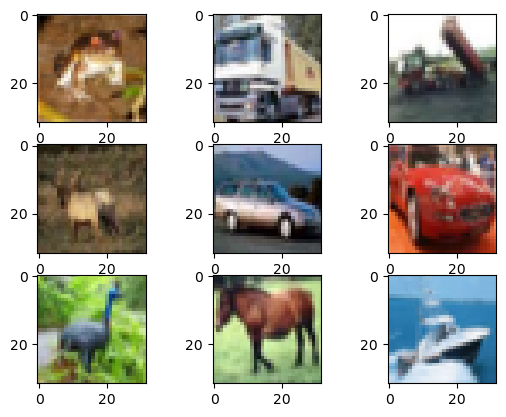

In [3]:
for i in range(0, 9):
    plt.subplot(3,3, i+1)
    plt.imshow((x_train[i]))
plt.show()

In [4]:
print('x_train', len(x_train))
print('y_train', len(y_train))

x_train 50000
y_train 50000


In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train/255.0 
x_test = x_test/255.0

In [6]:
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

In [7]:
print('x_train', len(x_train))
print('y_train', len(y_train))

x_train 50000
y_train 50000


In [8]:

epochs = 20
batch_size = 35
lr_rate = 0.01
n_classes = 10

In [9]:
model = Sequential()

model.add(Convolution2D(32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Convolution2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu', kernel_initializer='uniform'))
model.add(Dropout(0.30))
model.add(Dense(10, activation='softmax'))

C:\Users\PMYLS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [11]:
output = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/20
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.3176 - loss: 1.8277 - val_accuracy: 0.5387 - val_loss: 1.2711
Epoch 2/20
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.5242 - loss: 1.3239 - val_accuracy: 0.5910 - val_loss: 1.1334
Epoch 3/20
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.5819 - loss: 1.1798 - val_accuracy: 0.6348 - val_loss: 1.0346
Epoch 4/20
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.6083 - loss: 1.0918 - val_accuracy: 0.6630 - val_loss: 0.9628
Epoch 5/20
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.6345 - loss: 1.0346 - val_accuracy: 0.6758 - val_loss: 0.9327
Epoch 6/20
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.6528 - loss: 0.9849 - val_accuracy: 0.6687 - val_loss: 0.9376
Epoch 7/20
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.6635 - loss: 0.9562 - val_accuracy: 0.7035 - val_loss: 0.8561
Epoch 8/20
1429/1429 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.6791 -

In [19]:
print(model.evaluate(x_test, y_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7401 - loss: 0.7607
[0.7623797655105591, 0.738099992275238]


Text(0.5, 1.0, 'Accuracy Curves')

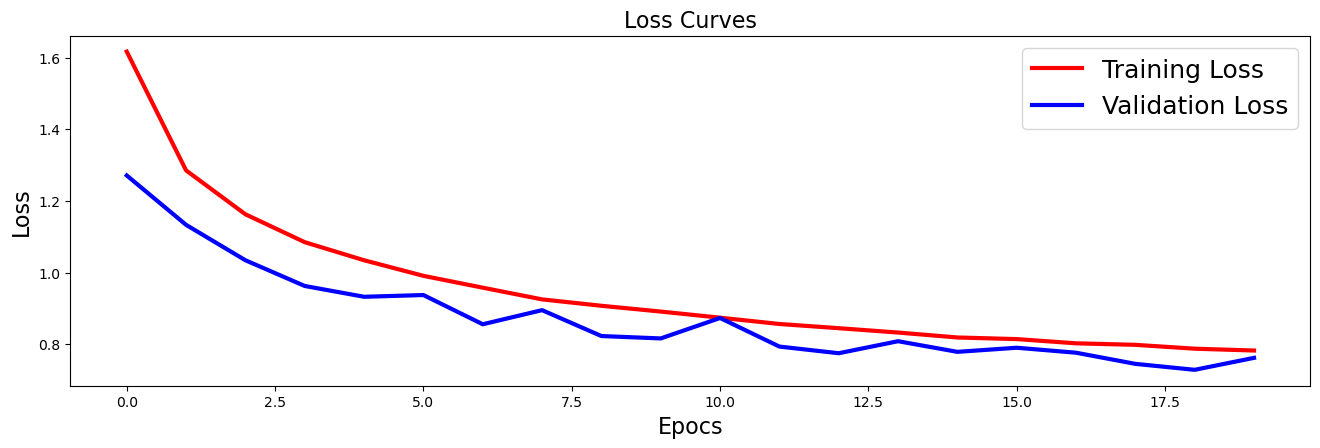

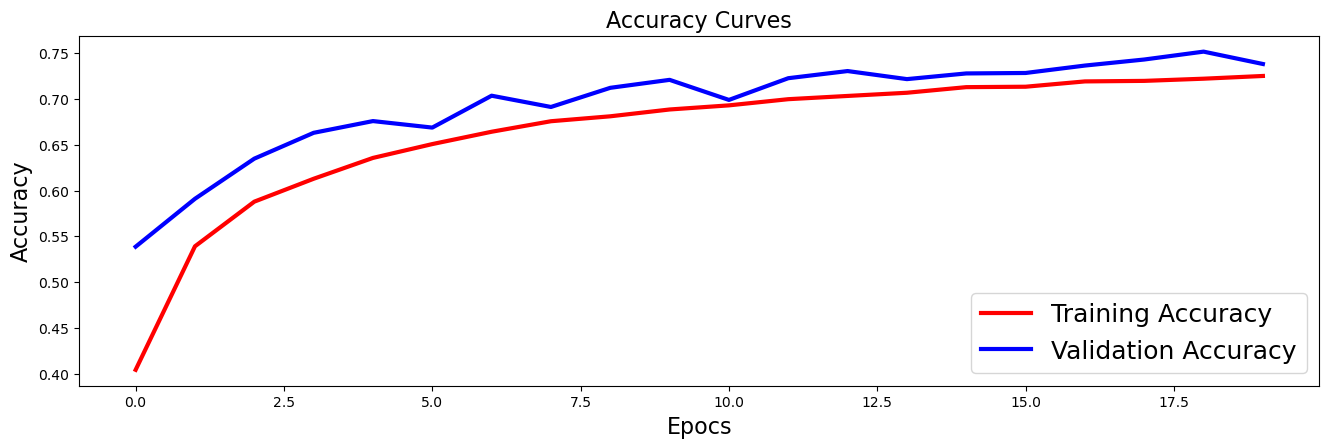

In [16]:
plt.figure(figsize=(16, 10))
plt.subplot(211)
plt.plot(output.history['loss'],'r', linewidth=3.0 )
plt.plot(output.history['val_loss'],'b', linewidth=3.0 )
plt.legend(['Training Loss', 'Validation Loss'], fontsize=18)
plt.xlabel('Epocs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves', fontsize=16)

plt.figure(figsize=(16, 10))
plt.subplot(212)
plt.plot(output.history['accuracy'],'r', linewidth=3.0 )
plt.plot(output.history['val_accuracy'],'b', linewidth=3.0 )
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=18)
plt.xlabel('Epocs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

In [27]:
from keras.layers import LeakyReLU

model2 = Sequential()

model2.add(Convolution2D(32, kernel_size=(3,3), activation='linear', input_shape=(32, 32, 3)))
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))

model2.add(Convolution2D(64, kernel_size=(3,3), activation='linear'))
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))

model2.add(Convolution2D(128, kernel_size=(3,3), activation='linear'))
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.30))

model2.add(Flatten())

model2.add(Dense(512, activation='linear', kernel_initializer='uniform'))
model2.add(LeakyReLU(alpha=0.1))
model2.add(Dropout(0.20))
model2.add(Dense(10, activation='softmax'))

C:\Users\PMYLS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\PMYLS\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adadelta

delta = Adadelta(learning_rate=1.0)
model2.compile(loss = 'categorical_crossentropy', optimizer = delta, metrics=['accuracy'])

batch_size = 100
epochs = 50

datagen = ImageDataGenerator(zoom_range=0.2,
                            rotation_range=10,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=True,
                            vertical_flip=False)

output2 = model2.fit(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50


C:\Users\PMYLS\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


500/500 ━━━━━━━━━━━━━━━━━━━━ 32s 59ms/step - accuracy: 0.2230 - loss: 2.0833 - val_accuracy: 0.4677 - val_loss: 1.4903
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 29s 58ms/step - accuracy: 0.4211 - loss: 1.5945 - val_accuracy: 0.5400 - val_loss: 1.2961
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 30s 59ms/step - accuracy: 0.4920 - loss: 1.4215 - val_accuracy: 0.5418 - val_loss: 1.2787
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 30s 58ms/step - accuracy: 0.5352 - loss: 1.3052 - val_accuracy: 0.6313 - val_loss: 1.0504
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 30s 60ms/step - accuracy: 0.5546 - loss: 1.2497 - val_accuracy: 0.6181 - val_loss: 1.0869
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 29s 58ms/step - accuracy: 0.5762 - loss: 1.1940 - val_accuracy: 0.6660 - val_loss: 0.9525
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 29s 58ms/step - accuracy: 0.5916 - loss: 1.1541 - val_accuracy: 0.6777 - val_loss: 0.9164
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 29s 57ms/step - accuracy: 0.6014 - loss: 1.1261 - val_accurac

In [36]:
print(model2.evaluate(x_test, y_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7875 - loss: 0.6119
[0.6114087104797363, 0.7888000011444092]


Text(0.5, 1.0, 'Accuracy Curves')

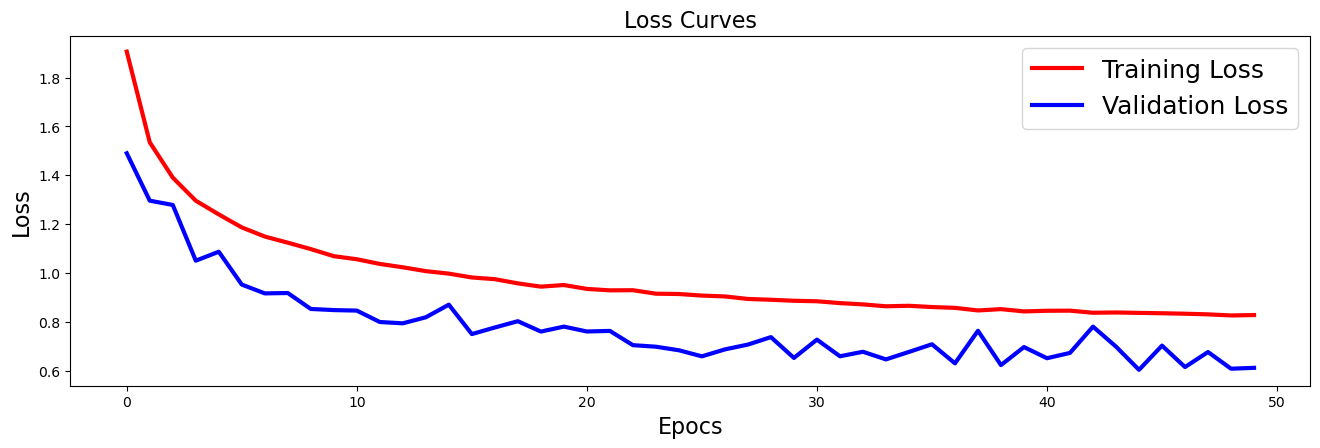

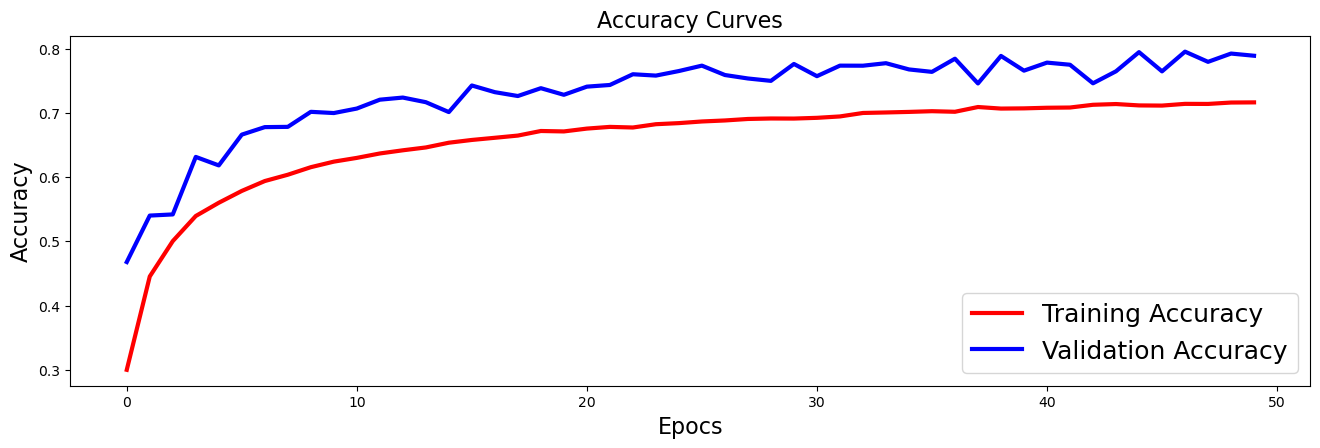

In [35]:
plt.figure(figsize=(16, 10))
plt.subplot(211)
plt.plot(output2.history['loss'],'r', linewidth=3.0 )
plt.plot(output2.history['val_loss'],'b', linewidth=3.0 )
plt.legend(['Training Loss', 'Validation Loss'], fontsize=18)
plt.xlabel('Epocs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves', fontsize=16)

plt.figure(figsize=(16, 10))
plt.subplot(212)
plt.plot(output2.history['accuracy'],'r', linewidth=3.0 )
plt.plot(output2.history['val_accuracy'],'b', linewidth=3.0 )
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=18)
plt.xlabel('Epocs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)